# Histograms and Scatterplots

## Histogram

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable and was first introduced by Karl Pearson. It differs from a bar graph, in the sense that a bar graph relates two variables, but a histogram relates only one. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.


Example:

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Histogram_of_arrivals_per_minute.svg/1280px-Histogram_of_arrivals_per_minute.svg.png)

We could extract some useful information from a histogram, like:
* Mean
* Std
* Kurtosis

### How to plot a Histogram


In [37]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        
        # Read in the data
        df_temp = pd.read_csv(
            symbol_to_path(symbol), 
            index_col="Date", 
            parse_dates=True, 
            usecols=['Date', 'Adj Close'],
            na_values=['nan'],
        )
    
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        # Join the dataframes
        df = df.join(df_temp)
        
        # Drop any rows where SPY is NaN
        df = df.dropna(subset=['SPY'])

    return df

In [8]:
def compute_daily_return(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.iloc[0, :] = 0 # set daily returns for row 0 to 0
    return daily_returns

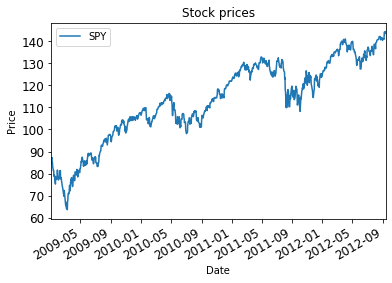

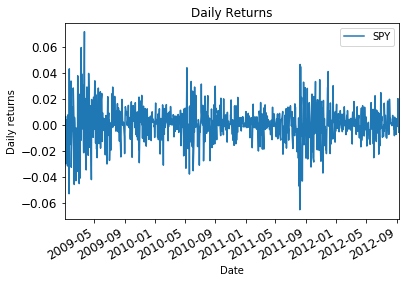

mean= 0.0006355783322251791
std= 0.013370490899409858


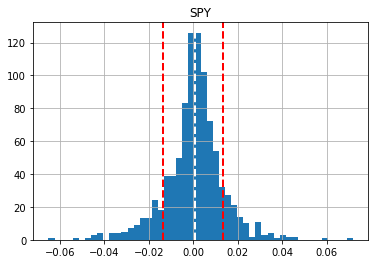

SPY    3.220278
dtype: float64


In [26]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ["SPY"]
df = get_data(symbols, dates)
plot_data(df)

# Comotue daily returns
daily_returns = compute_daily_return(df)
plot_data(daily_returns, title="Daily Returns", ylabel="Daily returns")

# Plot histogram
daily_returns.hist(bins=50)

# get mean and std
mean = daily_returns["SPY"].mean()
print("mean=", mean)
std = daily_returns["SPY"].std()
print("std=", std)

# Add mean and std to the plot
plt.axvline(mean, color="w", linestyle="dashed", linewidth=2)
plt.axvline(std, color="r", linestyle="dashed", linewidth=2)
plt.axvline(-std, color="r", linestyle="dashed", linewidth=2)
plt.show()

# Kurtosis
print(daily_returns.kurtosis())

### Plot two histograms

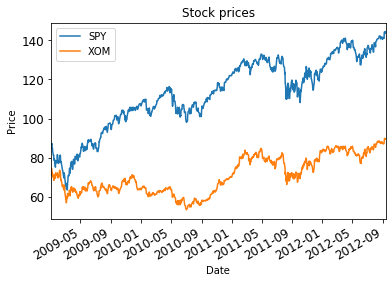

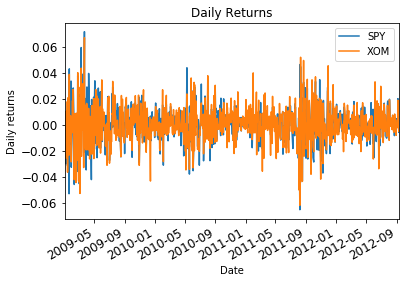

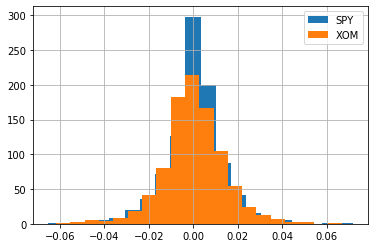

In [31]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ["SPY", "XOM"]
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_return(df)
plot_data(daily_returns, title="Daily Returns", ylabel="Daily returns")

# Compute and plot both histograms in the same plot
daily_returns["SPY"].hist(bins=20, label="SPY")
daily_returns["XOM"].hist(bins=20, label="XOM")
plt.legend(loc="upper right")
plt.show()

## Scatterplots

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

Example: 
![Image](https://upload.wikimedia.org/wikipedia/commons/0/0f/Oldfaithful3.png)

We have some properties that we can use:
* Slope of the line (beta β): If the slope is 1 we can conclude that if one of the stocks goes up the other will go to
* Where the line intercepts the vertical axis (alfa α): If the alfa is above 0, we can conclude that in average it goes better that the other one

### Plotting scatterplots

beta= 0.8507462236725956  alfa= -0.0002468672766800909


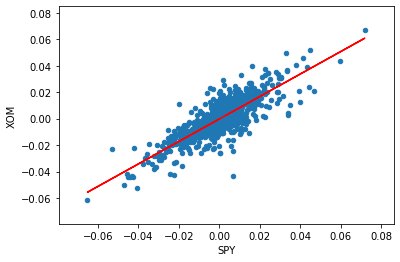

beta= 0.059761134832225046  alfa= 0.0007478811161601733


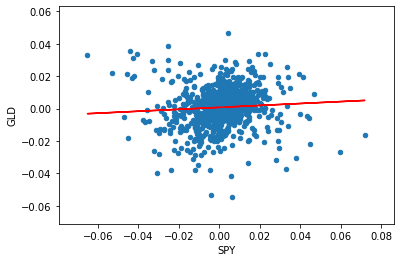

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [41]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ["SPY", "XOM", "GLD"]
df = get_data(symbols, dates)

# Compute daily returns
daily_returns = compute_daily_return(df)

# Scatterplot SPT vs XOM
daily_returns.plot(kind="scatter", x="SPY", y="XOM")
# Transform the points into a polynomial of magnitude 1, so we have Bx + A
beta_XOM, alfa_XOM = np.polyfit(daily_returns["SPY"], daily_returns["XOM"],1)
print("beta=", beta_XOM, " alfa=", alfa_XOM)
# Now we plot the graph as a function of alfa and beta
plt.plot(daily_returns["SPY"], beta_XOM*daily_returns["SPY"] + alfa_XOM, '-',  color="r")
plt.show()

# Scatterplot SPT vs GLD
daily_returns.plot(kind="scatter", x="SPY", y="GLD")
# Transform the points into a polynomial of magnitude 1, so we have Bx + A
beta_GLD, alfa_GLD = np.polyfit(daily_returns["SPY"], daily_returns["GLD"],1)
print("beta=", beta_GLD, " alfa=", alfa_GLD)
# Now we plot the graph as a function of alfa and beta
plt.plot(daily_returns["SPY"], beta_GLD*daily_returns["SPY"] + alfa_GLD, '-',  color="r")
plt.show()

# Calculate correlation
print(daily_returns.corr(method="pearson"))